In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import datetime

import requests
from config import api_key
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
from pprint import pprint

In [2]:
# csv file paths
amazon_daily_path = "Resources/amazon_daily_stock.csv"
target_daily_path = "Resources/target_daily_stock.csv"
covid_path = "Resources/covid_testing.csv"

In [3]:
#read file paths
amazon_daily = pd.read_csv(amazon_daily_path)
target_daily = pd.read_csv(target_daily_path)
covid_daily = pd.read_csv(covid_path)

In [4]:
#merge target and amazon dataset
amzn_tgt_df = pd.merge(amazon_daily, target_daily ,how='outer', on='date', suffixes = ('_Amazon', '_Target'))

In [5]:
amzn_tgt_df.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,Close_Target,Adj Close_Target,Volume_Target
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,115.779999,113.485497,6779200
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,115.440002,113.152229,3865100
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,114.269997,112.005417,5250600
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,114.669998,112.397491,4466400
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,110.739998,108.545372,6961900


In [6]:
#create death increase per positivty increase 
covid_daily['death_per_positive']= covid_daily['deathIncrease']/ covid_daily['positiveIncrease']

In [7]:
covid_daily['ventilator_%']= covid_daily['onVentilatorCurrently']/ covid_daily['hospitalizedCurrently']

In [8]:
covid_daily.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%
0,2021-01-22,404695.0,3980,40687.0,22008.0,4325,116264.0,776384.0,221900013.0,1375093,3919.0,7236.0,24483676.0,188983,56,291407518,1988756,0.021060,0.062238
1,2021-01-21,400715.0,3878,40481.0,22309.0,4053,119949.0,772059.0,220524920.0,1263704,3910.0,7370.0,24294693.0,184033,56,289418762,1899019,0.021072,0.061443
2,2021-01-20,396837.0,4409,40340.0,22809.0,5105,122700.0,768006.0,219261216.0,1283431,3897.0,7564.0,24110660.0,186722,56,287519743,1788698,0.023613,0.061646
3,2021-01-19,392428.0,2141,40103.0,23029.0,3206,123820.0,762901.0,217977785.0,1301789,3883.0,7688.0,23923938.0,144047,56,285731045,1698121,0.014863,0.062090
4,2021-01-18,390287.0,1395,39973.0,23226.0,2839,123848.0,759695.0,216675996.0,1679248,3865.0,7772.0,23779891.0,150220,56,284032924,2088685,0.009286,0.062754


In [9]:
covid_daily['new_datetime'] = pd.to_datetime(covid_daily['date'])

In [10]:
covid_daily['Month_year']= covid_daily['new_datetime'].dt.strftime('%Y-%m')

In [11]:
covid_month_groupby = covid_daily.groupby('Month_year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

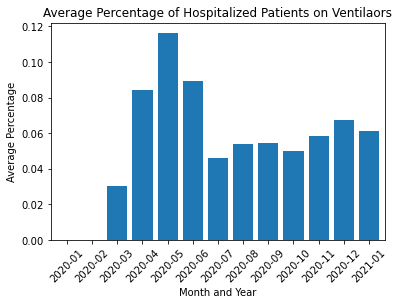

In [12]:
vent_bar = covid_month_groupby['ventilator_%'].mean().plot.bar(width=.8)

vent_bar.set_title("Average Percentage of Hospitalized Patients on Ventilaors")
vent_bar.set_xlabel("Month and Year")
vent_bar.set_ylabel("Average Percentage")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

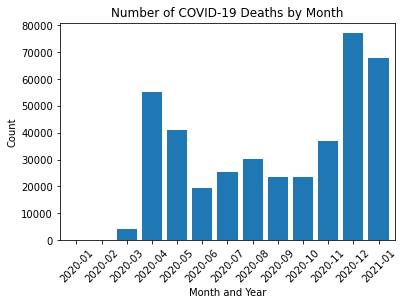

In [13]:
death_bar = covid_month_groupby['deathIncrease'].sum().plot.bar(width=.8)

death_bar.set_title("Number of COVID-19 Deaths by Month")
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Count")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

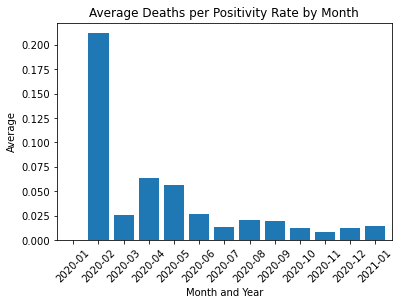

In [26]:
death_bar = covid_month_groupby['death_per_positive'].mean().plot.bar(width=.8)

death_bar.set_title("Average Deaths per Positivity Rate by Month")
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Average")

plt.xticks(rotation=45)

In [14]:
#merge stock and covid dataset on date
stock_covid_merge = pd.merge(amzn_tgt_df, covid_daily ,how='outer', on="date")

In [15]:
#convert date column into datetime format for grouping

stock_covid_merge['new_datetime'] = pd.to_datetime(stock_covid_merge['date'])

In [16]:
stock_covid_merge.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,...,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%,new_datetime,Month_year
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27,NaN
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28,NaN
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29,NaN
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30,NaN
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31,NaN


In [17]:
#create new Month_year data for grouping monthly data
stock_covid_merge['Month_year']= stock_covid_merge['new_datetime'].dt.strftime('%Y-%m')

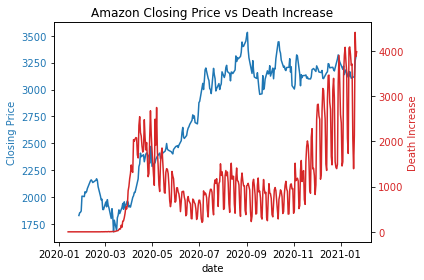

In [18]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Amazon'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Amazon Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()

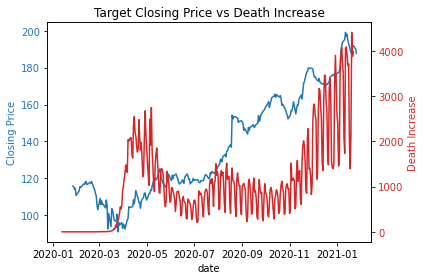

In [19]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Target'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Target Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()

In [59]:
#groupby month_year for merged data
month_groupby = stock_covid_merge.groupby('Month_year')

In [21]:
month_groupby.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,...,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%,new_datetime,Month_year
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27,2020-01
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28,2020-01
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29,2020-01
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30,2020-01
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1/4/2021,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400.0,176.509995,178.089996,174.119995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,2021-01
238,1/5/2021,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500.0,176.800003,181.970001,176.429993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05,2021-01
239,1/6/2021,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800.0,180.330002,189.470001,180.110001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,2021-01
240,1/7/2021,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500.0,189.210007,192.350006,189.169998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-07,2021-01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

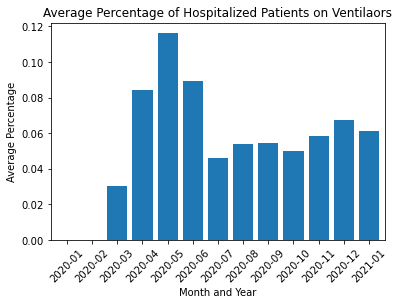

In [22]:
vent_bar = month_groupby['ventilator_%'].mean().plot.bar(width=.8)

vent_bar.set_title("Average Percentage of Hospitalized Patients on Ventilaors")
vent_bar.set_xlabel("Month and Year")
vent_bar.set_ylabel("Average Percentage")

plt.xticks(rotation=45)

In [55]:
#API query
query = "Target Stock Strategy"

begin_date = "20200401"
end_date = "20210130"

query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"

In [56]:
articles = requests.get(query_url).json()
articles_list = articles["response"]["docs"]

for article in articles_list:
    print(f'A snippet from the article: {article["snippet"]}')
    print('---------------------------')

A snippet from the article: For the crucial Senate runoffs, the G.O.P. is focusing its attacks on the Rev. Raphael Warnock, portraying him as radical, a claim he has rejected but one that worked for Republicans in down-ballot races last month.
---------------------------
A snippet from the article: But there is still time to keep the presidential election fair.
---------------------------
A snippet from the article: A study by Morningstar found that losses particularly affected families with younger children who opted for age-based investments heavily weighted in stocks.
---------------------------
A snippet from the article: Here’s what you need to know at the end of the day.
---------------------------
A snippet from the article: Despite a horrendous record in forecasting, Wall Street is making bullish predictions for the stock market next year. Ignore them but invest anyway, our columnist says.
---------------------------
A snippet from the article: Classic investment strategies are

In [57]:
articles_list = articles["response"]["docs"]
pprint(articles_list)

[{'_id': 'nyt://article/98e00ac7-c09f-5332-a505-e355227081e3',
  'abstract': 'For the crucial Senate runoffs, the G.O.P. is focusing its '
              'attacks on the Rev. Raphael Warnock, portraying him as radical, '
              'a claim he has rejected but one that worked for Republicans in '
              'down-ballot races last month.',
  'byline': {'organization': None,
             'original': 'By Jonathan Martin and Astead W. Herndon',
             'person': [{'firstname': 'Jonathan',
                         'lastname': 'Martin',
                         'middlename': None,
                         'organization': '',
                         'qualifier': None,
                         'rank': 1,
                         'role': 'reported',
                         'title': None},
                        {'firstname': 'Astead',
                         'lastname': 'Herndon',
                         'middlename': 'W.',
                         'organization': '',
          

  'multimedia': [{'caption': None,
                  'credit': None,
                  'crop_name': 'articleLarge',
                  'height': 400,
                  'legacy': {'xlarge': 'images/2020/08/19/opinion/19Hasen/19Hasen-articleLarge-v2.jpg',
                             'xlargeheight': 400,
                             'xlargewidth': 600},
                  'rank': 0,
                  'subType': 'xlarge',
                  'subtype': 'xlarge',
                  'type': 'image',
                  'url': 'images/2020/08/19/opinion/19Hasen/19Hasen-articleLarge-v2.jpg',
                  'width': 600},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'popup',
                  'height': 433,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'popup',
                  'subtype': 'popup',
                  'type': 'image',
                  'url': 'images/2020/08/19/opinion/19Hasen/19Hasen-

                  'subtype': 'largeWidescreen1050',
                  'type': 'image',
                  'url': 'images/2020/08/19/opinion/19Hasen/19Hasen-largeWidescreen1050-v3.jpg',
                  'width': 1050},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'thumbWide',
                  'height': 126,
                  'legacy': {'wide': 'images/2020/08/19/opinion/19Hasen/19Hasen-thumbWide-v2.jpg',
                             'wideheight': 126,
                             'widewidth': 190},
                  'rank': 0,
                  'subType': 'wide',
                  'subtype': 'wide',
                  'type': 'image',
                  'url': 'images/2020/08/19/opinion/19Hasen/19Hasen-thumbWide-v2.jpg',
                  'width': 190},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'videoThumb',
                  'height': 50,
                  'legacy': {},
     

                 {'caption': None,
                  'credit': None,
                  'crop_name': 'horizontalMediumAt2X',
                  'height': 1666,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'horizontalMediumAt2X',
                  'subtype': 'horizontalMediumAt2X',
                  'type': 'image',
                  'url': 'images/2020/05/30/business/30Adviser-illo/29Adviser-illo-horizontalMediumAt2X.jpg',
                  'width': 2500},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'hpLarge',
                  'height': 287,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'hpLarge',
                  'subtype': 'hpLarge',
                  'type': 'image',
                  'url': 'images/2020/05/30/business/30Adviser-illo/29Adviser-illo-hpLarge.jpg',
                  'width': 511},
                 {'caption': None,
           

  'multimedia': [{'caption': None,
                  'credit': None,
                  'crop_name': 'articleLarge',
                  'height': 400,
                  'legacy': {'xlarge': 'images/2020/06/08/reader-center/060820evening-briefing-promo/merlin_173337735_5667be12-cf6e-453b-8a7f-5f64aba02156-articleLarge.jpg',
                             'xlargeheight': 400,
                             'xlargewidth': 600},
                  'rank': 0,
                  'subType': 'xlarge',
                  'subtype': 'xlarge',
                  'type': 'image',
                  'url': 'images/2020/06/08/reader-center/060820evening-briefing-promo/merlin_173337735_5667be12-cf6e-453b-8a7f-5f64aba02156-articleLarge.jpg',
                  'width': 600},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'popup',
                  'height': 433,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'popup',
 

                  'subType': 'watch268',
                  'subtype': 'watch268',
                  'type': 'image',
                  'url': 'images/2020/06/08/reader-center/060820evening-briefing-promo/060820evening-briefing-promo-watch268.jpg',
                  'width': 272},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'verticalTwoByThree735',
                  'height': 1103,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'verticalTwoByThree735',
                  'subtype': 'verticalTwoByThree735',
                  'type': 'image',
                  'url': 'images/2020/06/08/reader-center/060820evening-briefing-promo/060820evening-briefing-promo-verticalTwoByThree735.jpg',
                  'width': 735},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'mobileMasterAt3x',
                  'height': 1200,
                  'legacy

                  'subtype': 'wide',
                  'type': 'image',
                  'url': 'images/2020/12/20/business/19Strategies-illo-print/19Strategies-illo-print-thumbWide-v2.jpg',
                  'width': 190},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'videoThumb',
                  'height': 50,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'videoThumb',
                  'subtype': 'videoThumb',
                  'type': 'image',
                  'url': 'images/2020/12/20/business/19Strategies-illo-print/19Strategies-illo-print-videoThumb-v2.jpg',
                  'width': 75},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'videoLarge',
                  'height': 507,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'videoLarge',
                  'subtype': 'videoLarge',


                 {'caption': None,
                  'credit': None,
                  'crop_name': 'mediumThreeByTwo225',
                  'height': 150,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'mediumThreeByTwo225',
                  'subtype': 'mediumThreeByTwo225',
                  'type': 'image',
                  'url': 'images/2020/04/05/business/04Strategies-illo/04Strategies-illo-mediumThreeByTwo225.jpg',
                  'width': 225},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'mediumThreeByTwo440',
                  'height': 293,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'mediumThreeByTwo440',
                  'subtype': 'mediumThreeByTwo440',
                  'type': 'image',
                  'url': 'images/2020/04/05/business/04Strategies-illo/04Strategies-illo-mediumThreeByTwo440.jpg',
                  'width'

                  'credit': None,
                  'crop_name': 'popup',
                  'height': 433,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'popup',
                  'subtype': 'popup',
                  'type': 'image',
                  'url': 'images/2020/07/14/business/14diversity1/merlin_138613587_8f0beb32-4006-432a-89b2-64498f9a0b53-popup.jpg',
                  'width': 650},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'blog480',
                  'height': 320,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'blog480',
                  'subtype': 'blog480',
                  'type': 'image',
                  'url': 'images/2020/07/14/business/14diversity1/merlin_138613587_8f0beb32-4006-432a-89b2-64498f9a0b53-blog480.jpg',
                  'width': 480},
                 {'caption': None,
                  'credit': None,


                  'legacy': {},
                  'rank': 0,
                  'subType': 'videoFifteenBySeven2610',
                  'subtype': 'videoFifteenBySeven2610',
                  'type': 'image',
                  'url': 'images/2020/07/14/business/14diversity1/14diversity1-videoFifteenBySeven2610.jpg',
                  'width': 2610},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'facebookJumbo',
                  'height': 550,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'facebookJumbo',
                  'subtype': 'facebookJumbo',
                  'type': 'image',
                  'url': 'images/2020/07/14/business/14diversity1/14diversity1-facebookJumbo.jpg',
                  'width': 1050},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'watch308',
                  'height': 348,
                  'legacy': {},
 

                  'subtype': 'threeByTwoMediumAt2X',
                  'type': 'image',
                  'url': 'images/2020/12/19/business/19db-newsletter-spacs/merlin_181011396_fefafd02-c47d-44a6-8540-17e639251e8a-threeByTwoMediumAt2X.jpg',
                  'width': 1500},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'threeByTwoSmallAt2X',
                  'height': 400,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'threeByTwoSmallAt2X',
                  'subtype': 'threeByTwoSmallAt2X',
                  'type': 'image',
                  'url': 'images/2020/12/19/business/19db-newsletter-spacs/merlin_181011396_fefafd02-c47d-44a6-8540-17e639251e8a-threeByTwoSmallAt2X.jpg',
                  'width': 600},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'articleInline',
                  'height': 127,
                  'legacy': 

                 {'caption': None,
                  'credit': None,
                  'crop_name': 'largeWidescreen573',
                  'height': 322,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'largeWidescreen573',
                  'subtype': 'largeWidescreen573',
                  'type': 'image',
                  'url': 'images/2020/10/09/business/09virus-curbside-1/09virus-curbside-1-largeWidescreen573.jpg',
                  'width': 573},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'largeWidescreen1050',
                  'height': 591,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'largeWidescreen1050',
                  'subtype': 'largeWidescreen1050',
                  'type': 'image',
                  'url': 'images/2020/10/09/business/09virus-curbside-1/09virus-curbside-1-largeWidescreen1050.jpg',
                  'width'

                        {'firstname': 'Jason',
                         'lastname': 'Karaian',
                         'middlename': None,
                         'organization': '',
                         'qualifier': None,
                         'rank': 2,
                         'role': 'reported',
                         'title': None},
                        {'firstname': 'Michael',
                         'lastname': 'de la Merced',
                         'middlename': 'J.',
                         'organization': '',
                         'qualifier': None,
                         'rank': 3,
                         'role': 'reported',
                         'title': None},
                        {'firstname': 'Lauren',
                         'lastname': 'Hirsch',
                         'middlename': None,
                         'organization': '',
                         'qualifier': None,
                         'rank': 4,
                         '

                  'legacy': {},
                  'rank': 0,
                  'subType': 'videoSixteenByNine480',
                  'subtype': 'videoSixteenByNine480',
                  'type': 'image',
                  'url': 'images/2021/01/28/business/27db-newsletter-gamestop-print/merlin_182822946_b19d6d23-ce5b-4220-8196-ba309a3258dc-videoSixteenByNine480.jpg',
                  'width': 480},
                 {'caption': None,
                  'credit': None,
                  'crop_name': 'videoSixteenByNine310',
                  'height': 174,
                  'legacy': {},
                  'rank': 0,
                  'subType': 'videoSixteenByNine310',
                  'subtype': 'videoSixteenByNine310',
                  'type': 'image',
                  'url': 'images/2021/01/28/business/27db-newsletter-gamestop-print/merlin_182822946_b19d6d23-ce5b-4220-8196-ba309a3258dc-videoSixteenByNine310.jpg',
                  'width': 310},
                 {'caption': None,
 

In [58]:
print("Your Reading List")
for article in articles_list:
    print(article["web_url"])

Your Reading List
https://www.nytimes.com/2020/12/07/us/politics/georgia-senate-debate-warnock-loeffler.html
https://www.nytimes.com/2020/08/19/opinion/trump-usps-mail-voting.html
https://www.nytimes.com/2020/05/29/your-money/college-529-plan-coronavirus.html
https://www.nytimes.com/2020/06/08/briefing/george-floyd-defunding-stock-rally.html
https://www.nytimes.com/2020/12/18/business/stock-market-forecasts-wall-street.html
https://www.nytimes.com/2020/04/03/business/stock-market-coronavirus-strategy.html
https://www.nytimes.com/2020/07/14/business/economy/corporate-diversity-pay-compensation.html
https://www.nytimes.com/2020/12/19/business/dealbook/deals-mergers-acquisitions-2020.html
https://www.nytimes.com/2020/10/09/business/retailers-curbside-pickup.html
https://www.nytimes.com/2021/01/27/business/dealbook/reddit-wallstreetbets-gamestop.html
